In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["axes.facecolor"] = "#f7f7f7"
plt.rcParams["font.size"] = 24

In [3]:
def plot_mean_se(y, y_lower, y_upper, color="black", alpha=1, label="", line_width=4, marker=None):
    x = np.arange(1, len(y)+1)
    plt.plot(x, y, color=color, label=label, linewidth=line_width, marker=marker)
    plt.fill_between(x, y_lower, y_upper, alpha=alpha, color=color)

In [4]:
four_df = pd.read_csv("in/fourroom/fourrooms_learning_curves.csv", index_col=0)
pin_df = pd.read_csv("in/pinball/learning_curve.csv", index_col=0)
pick_df = pd.read_csv("in/picknplace/learning_curve.csv", index_col=0)
print("columns of fourroom: {}".format(four_df.columns.tolist()))
print("columns of pinball: {}".format(pin_df.columns.tolist()))
print("columns of picknplace: {}".format(pick_df.columns.tolist()))

columns of fourroom: ['DYN-HUMAN-mean', 'DYN-HUMAN-se', 'DYN-HUMAN-upper', 'DYN-HUMAN-lower', 'DYN-RANDOM-mean', 'DYN-RANDOM-se', 'DYN-RANDOM-upper', 'DYN-RANDOM-lower', 'STATIC-HUMAN-mean', 'STATIC-HUMAN-se', 'STATIC-HUMAN-upper', 'STATIC-HUMAN-lower', 'STATIC-RANDOM-mean', 'STATIC-RANDOM-se', 'STATIC-RANDOM-upper', 'STATIC-RANDOM-lower', 'SARSA-mean', 'SARSA-se', 'SARSA-upper', 'SARSA-lower', 'LINRS-mean', 'LINRS-se', 'LINRS-upper', 'LINRS-lower', 'NRS-mean', 'NRS-se', 'NRS-upper', 'NRS-lower']
columns of pinball: ['DYN-HUMAN-mean', 'DYN-HUMAN-se', 'DYN-HUMAN-mv', 'DYN-HUMAN-lower', 'DYN-HUMAN-upper', 'DYN-RANDOM-mean', 'DYN-RANDOM-se', 'DYN-RANDOM-mv', 'DYN-RANDOM-lower', 'DYN-RANDOM-upper', 'LINRS-mean', 'LINRS-se', 'LINRS-mv', 'LINRS-lower', 'LINRS-upper', 'NRS-mean', 'NRS-se', 'NRS-mv', 'NRS-lower', 'NRS-upper', 'STATIC-HUMAN-mean', 'STATIC-HUMAN-se', 'STATIC-HUMAN-mv', 'STATIC-HUMAN-lower', 'STATIC-HUMAN-upper', 'STATIC-RANDOM-mean', 'STATIC-RANDOM-se', 'STATIC-RANDOM-mv', 'STAT

# Performance Comaparison

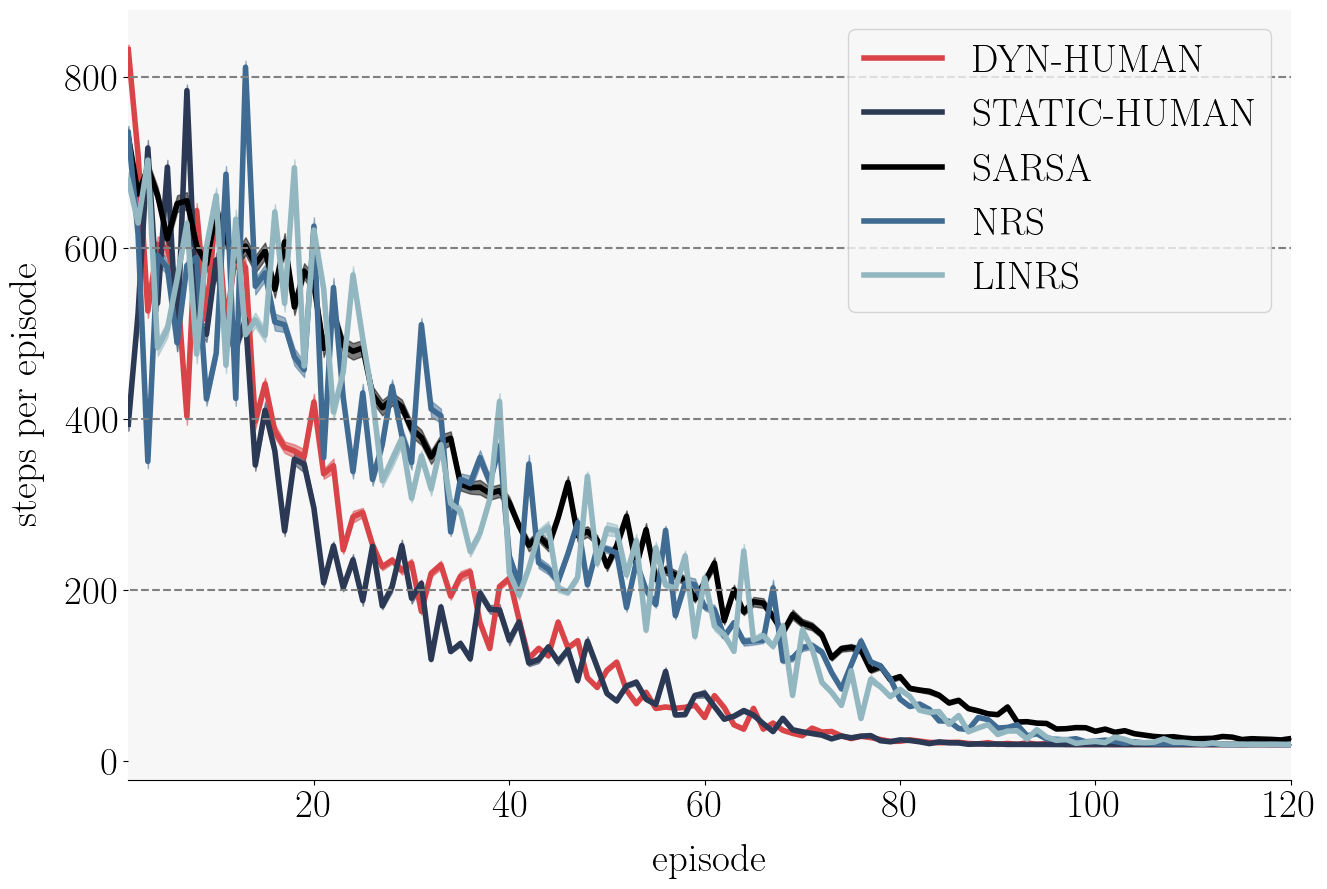

In [14]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelsize=28)
plot_mean_se(four_df["DYN-HUMAN-mean"][:l_episodes], four_df["DYN-HUMAN-lower"][:l_episodes], four_df["DYN-HUMAN-upper"][:l_episodes], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(four_df["STATIC-HUMAN-mean"][:l_episodes], four_df["STATIC-HUMAN-lower"][:l_episodes], four_df["STATIC-HUMAN-upper"][:l_episodes], "#2b3955", 0.5, "STATIC-HUMAN")
plot_mean_se(four_df["SARSA-mean"][:l_episodes], four_df["SARSA-lower"][:l_episodes], four_df["SARSA-upper"][:l_episodes], "black", 0.5, "SARSA")
plot_mean_se(four_df["NRS-mean"][:l_episodes], four_df["NRS-lower"][:l_episodes], four_df["NRS-upper"][:l_episodes], "#406c93", 0.5, "NRS")
plot_mean_se(four_df["LINRS-mean"][:l_episodes], four_df["LINRS-lower"][:l_episodes], four_df["LINRS-upper"][:l_episodes], "#92b7c0", 0.5, "LINRS")
plt.hlines([200, 400, 600, 800], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("steps per episode", fontsize=28, labelpad=15)
plt.xlabel("episode", fontsize=28, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.plot()
plt.savefig("out/4room-lc-performance.pdf", format="pdf")

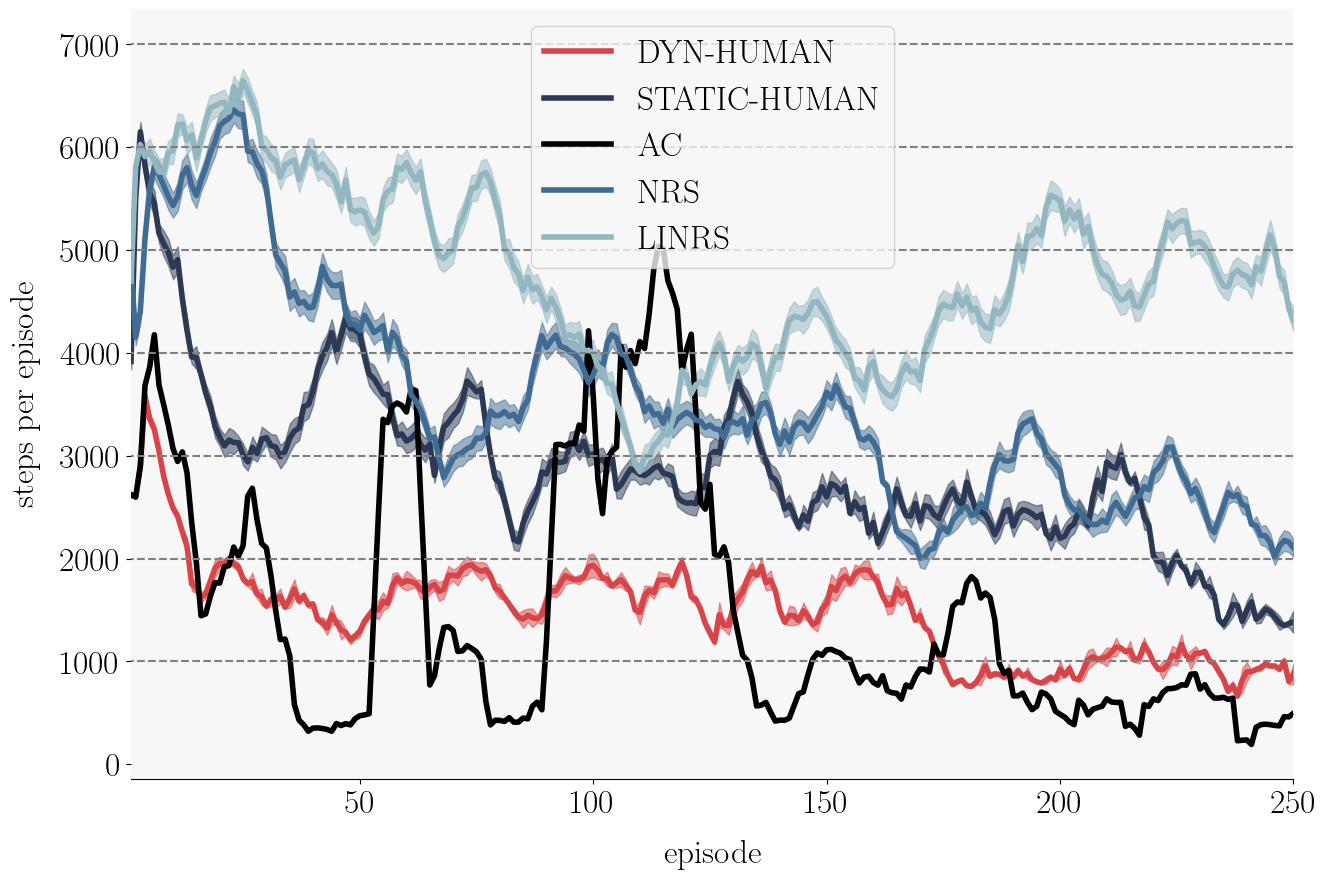

In [15]:
l_episodes = 250
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=24)
target_pin_df = pin_df.loc[:l_episodes, :]
plot_mean_se(target_pin_df["DYN-HUMAN-mv"], target_pin_df["DYN-HUMAN-lower"], target_pin_df["DYN-HUMAN-upper"], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(target_pin_df["STATIC-HUMAN-mv"], target_pin_df["STATIC-HUMAN-lower"], target_pin_df["STATIC-HUMAN-upper"], "#2b3955", 0.5, "STATIC-HUMAN")
plot_mean_se(target_pin_df["AC-mv"], target_pin_df["AC-lower"], target_pin_df["AC-upper"], "black", 0.5, "AC")
plot_mean_se(target_pin_df["NRS-mv"], target_pin_df["NRS-lower"], target_pin_df["NRS-upper"], "#406c93", 0.5, "NRS")
plot_mean_se(target_pin_df["LINRS-mv"], target_pin_df["LINRS-lower"], target_pin_df["LINRS-upper"], "#92b7c0", 0.5, "LINRS")
plt.hlines([1000, 2000, 3000, 4000, 5000, 6000, 7000], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("steps per episode", fontsize=24, labelpad=15)
plt.xlabel("episode", fontsize=24, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=24)
plt.tick_params(labelsize=24)
plt.savefig("out/pinball-lc-performance.pdf", format="pdf")
# plt.plot()

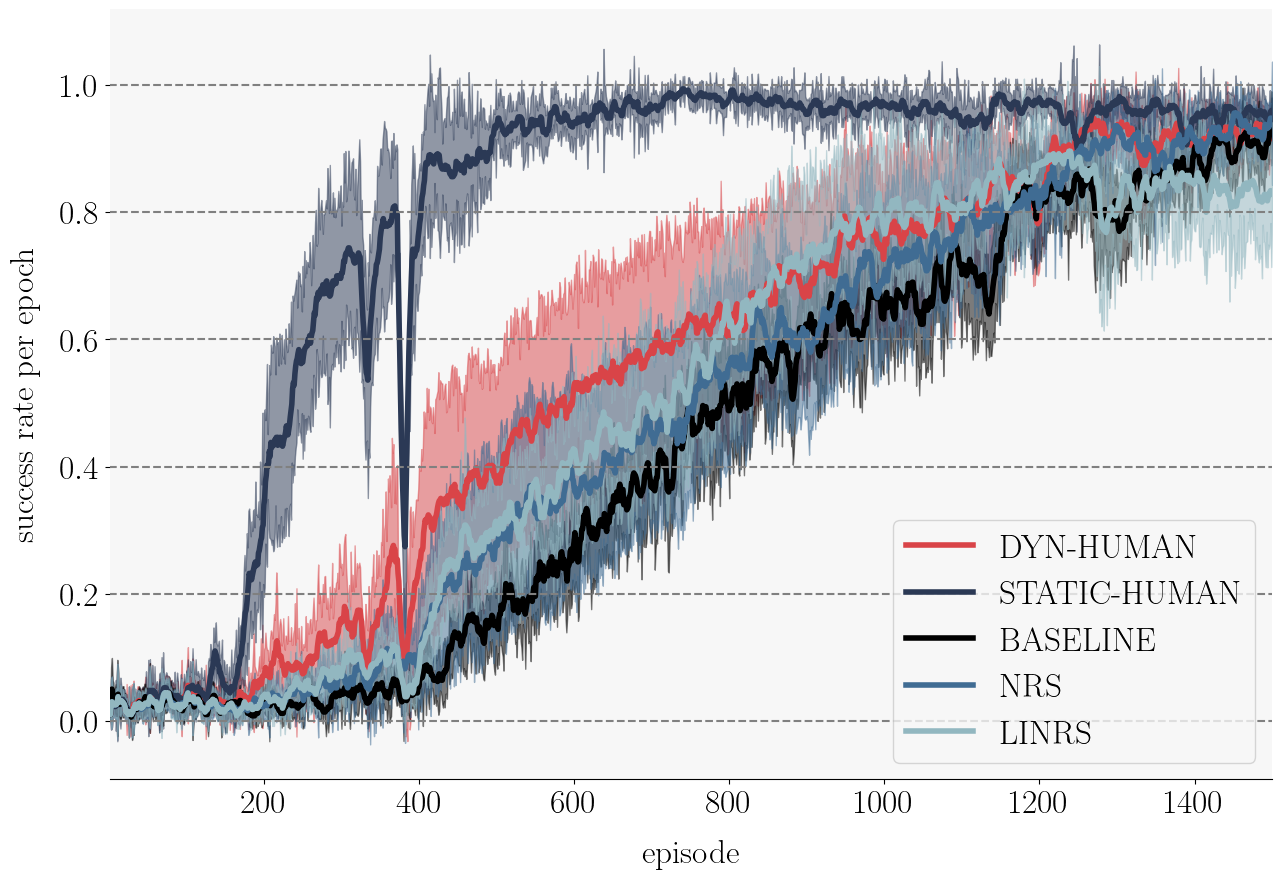

In [16]:
l_episodes = 1500
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=24)
target_pick_df = pick_df.loc[:l_episodes, :]
plot_mean_se(target_pick_df["DTA-mv"], target_pick_df["DTA-lower"], target_pick_df["DTA-upper"], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(target_pick_df["SRS-mv"], target_pick_df["SRS-lower"], target_pick_df["SRS-upper"],  "#2b3955", 0.5, "STATIC-HUMAN")
plot_mean_se(target_pick_df["BASELINE-mv"], target_pick_df["BASELINE-lower"], target_pick_df["BASELINE-upper"], "black", 0.5, "BASELINE")
plot_mean_se(target_pick_df["NRS-mv"], target_pick_df["NRS-lower"], target_pick_df["NRS-upper"], "#406c93", 0.5, "NRS")
plot_mean_se(target_pick_df["LINRS-mv"], target_pick_df["LINRS-lower"], target_pick_df["LINRS-upper"], "#92b7c0", 0.5, "LINRS")
plt.hlines([0, 0.2, 0.4, 0.6, 0.8, 1], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("success rate per epoch", fontsize=24, labelpad=15)
plt.xlabel("episode", fontsize=24, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=24)
plt.savefig("out/picknplace-lc-performance.pdf", format="pdf")

# Subgoal Quality

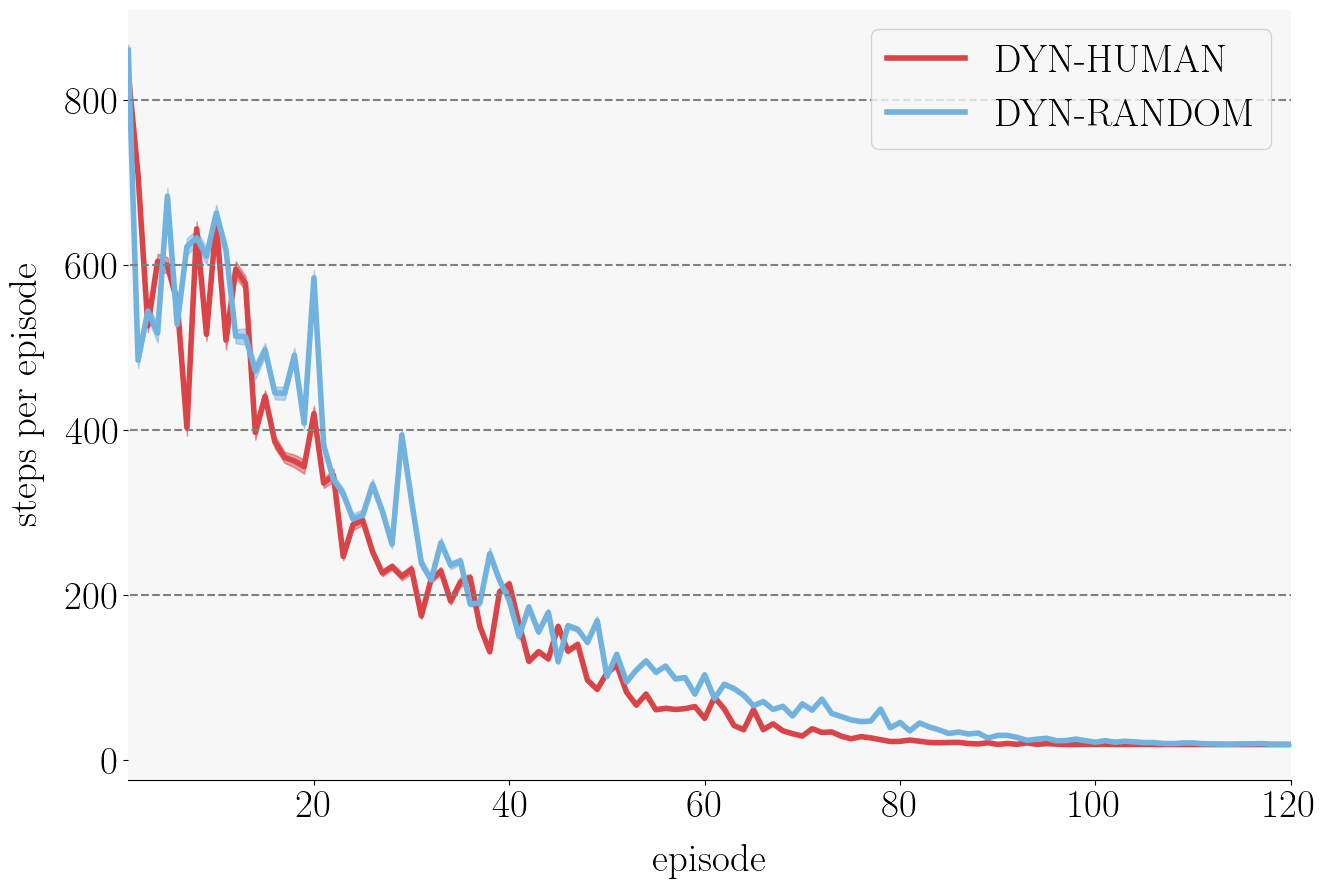

In [17]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=28)
plot_mean_se(four_df["DYN-HUMAN-mean"][:l_episodes], four_df["DYN-HUMAN-lower"][:l_episodes], four_df["DYN-HUMAN-upper"][:l_episodes], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(four_df["DYN-RANDOM-mean"][:l_episodes], four_df["DYN-RANDOM-lower"][:l_episodes], four_df["DYN-RANDOM-upper"][:l_episodes], "#72B2DF", 0.5, "DYN-RANDOM")
plt.hlines([200, 400, 600, 800], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("steps per episode", fontsize=28, labelpad=15)
plt.xlabel("episode", fontsize=28, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.plot()
plt.savefig("out/4room-lc-dynamic-subgoal.pdf", format="pdf")

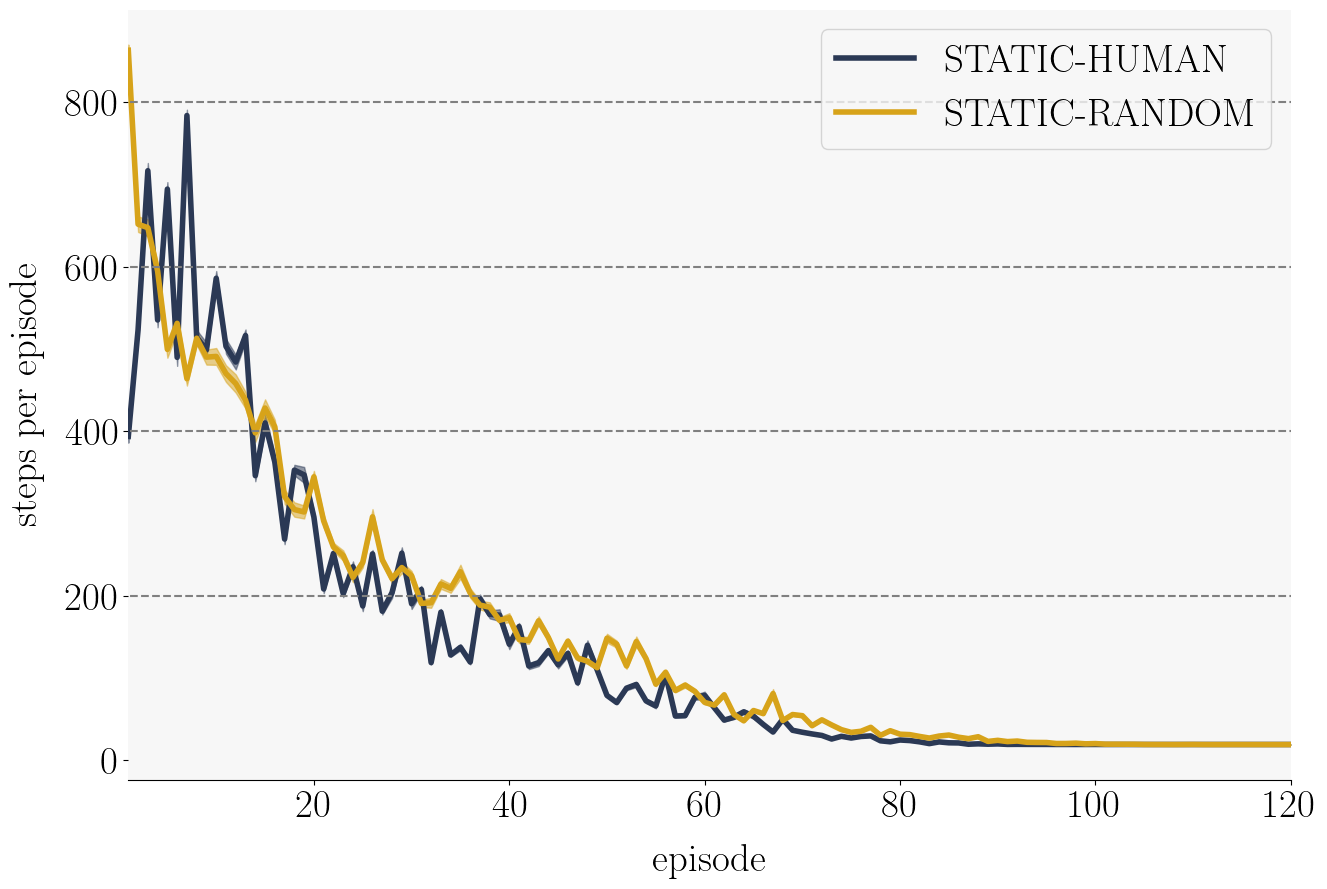

In [18]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=28)
plot_mean_se(four_df["STATIC-HUMAN-mean"][:l_episodes], four_df["STATIC-HUMAN-lower"][:l_episodes], four_df["STATIC-HUMAN-upper"][:l_episodes], "#2b3955", 0.5, "STATIC-HUMAN")
plot_mean_se(four_df["STATIC-RANDOM-mean"][:l_episodes], four_df["STATIC-RANDOM-lower"][:l_episodes], four_df["STATIC-RANDOM-upper"][:l_episodes], "#D7A31A", 0.5, "STATIC-RANDOM")
plt.hlines([200, 400, 600, 800], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("steps per episode", fontsize=28, labelpad=15)
plt.xlabel("episode", fontsize=28, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.plot()
plt.savefig("out/4room-lc-static-subgoal.pdf", format="pdf")

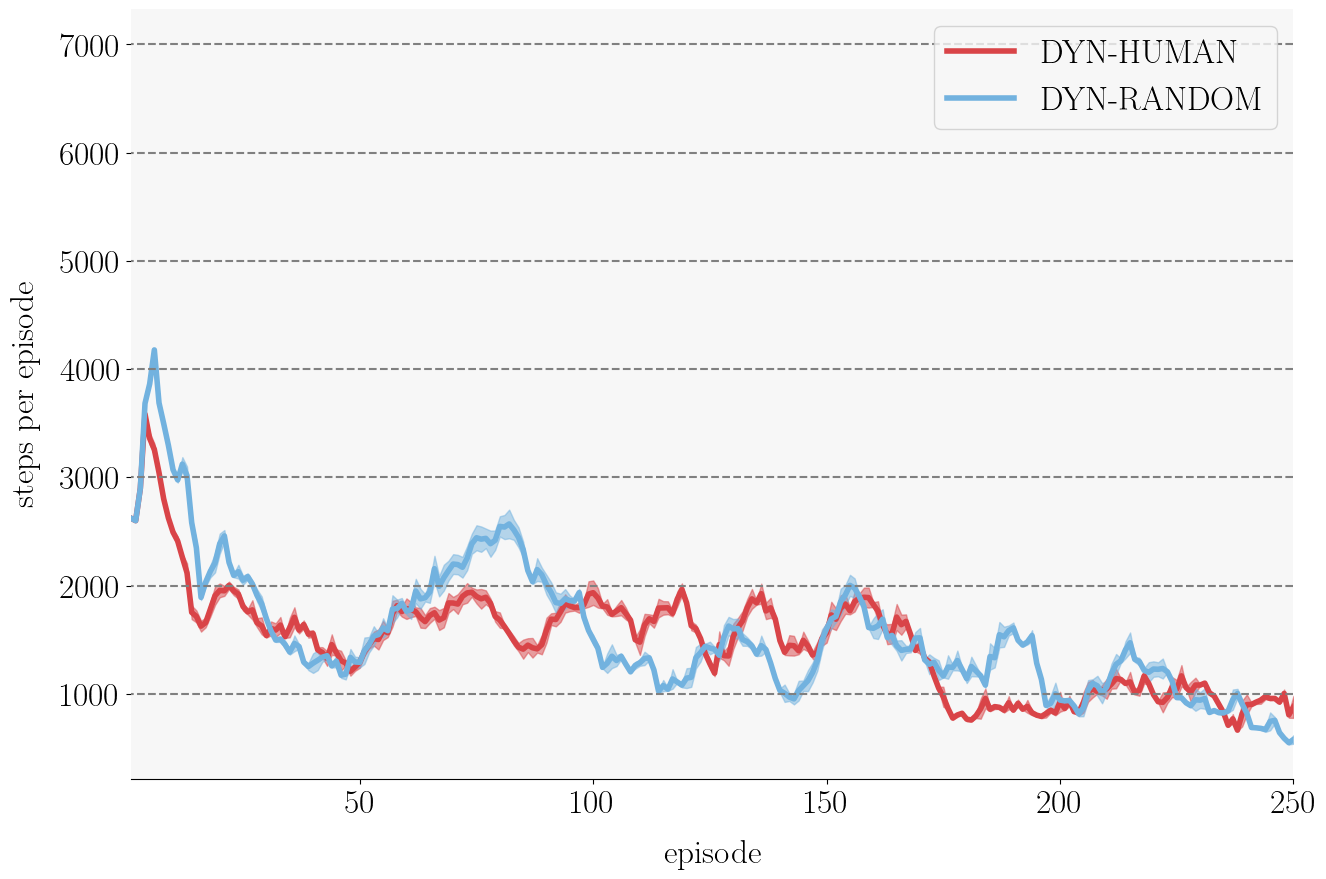

In [19]:
l_episodes = 250
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=24)
target_pin_df = pin_df.loc[:l_episodes, :]
plot_mean_se(target_pin_df["DYN-HUMAN-mv"], target_pin_df["DYN-HUMAN-lower"], target_pin_df["DYN-HUMAN-upper"], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(target_pin_df["DYN-RANDOM-mv"], target_pin_df["DYN-RANDOM-lower"], target_pin_df["DYN-RANDOM-upper"], "#72B2DF", 0.5, "DYN-RANDOM")
plt.hlines([1000, 2000, 3000, 4000, 5000, 6000, 7000], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("steps per episode", fontsize=24, labelpad=15)
plt.xlabel("episode", fontsize=24, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=24)
plt.tick_params(labelsize=24)
plt.savefig("out/pinball-lc-dynamic-subgoal.pdf", format="pdf")
# plt.plot()

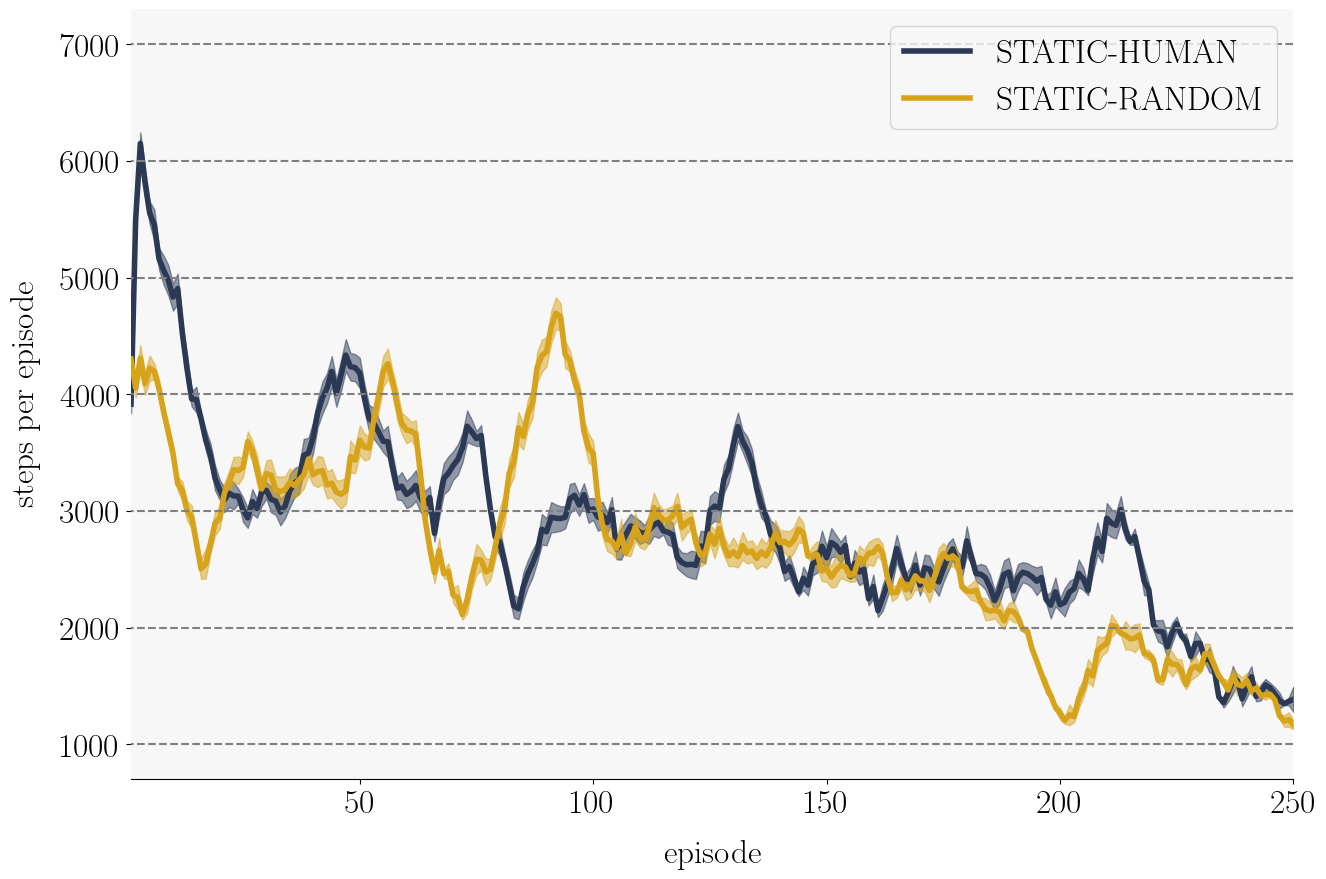

In [20]:
l_episodes = 250
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=24)
target_pin_df = pin_df.loc[:l_episodes, :]
plot_mean_se(target_pin_df["STATIC-HUMAN-mv"], target_pin_df["STATIC-HUMAN-lower"], target_pin_df["STATIC-HUMAN-upper"], "#2b3955", 0.5, "STATIC-HUMAN")
plot_mean_se(target_pin_df["STATIC-RANDOM-mv"], target_pin_df["STATIC-RANDOM-lower"], target_pin_df["STATIC-RANDOM-upper"], "#D7A31A", 0.5, "STATIC-RANDOM")
plt.hlines([1000, 2000, 3000, 4000, 5000, 6000, 7000], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("steps per episode", fontsize=24, labelpad=15)
plt.xlabel("episode", fontsize=24, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=24)
plt.tick_params(labelsize=24)
plt.savefig("out/pinball-lc-static-subgoal.pdf", format="pdf")

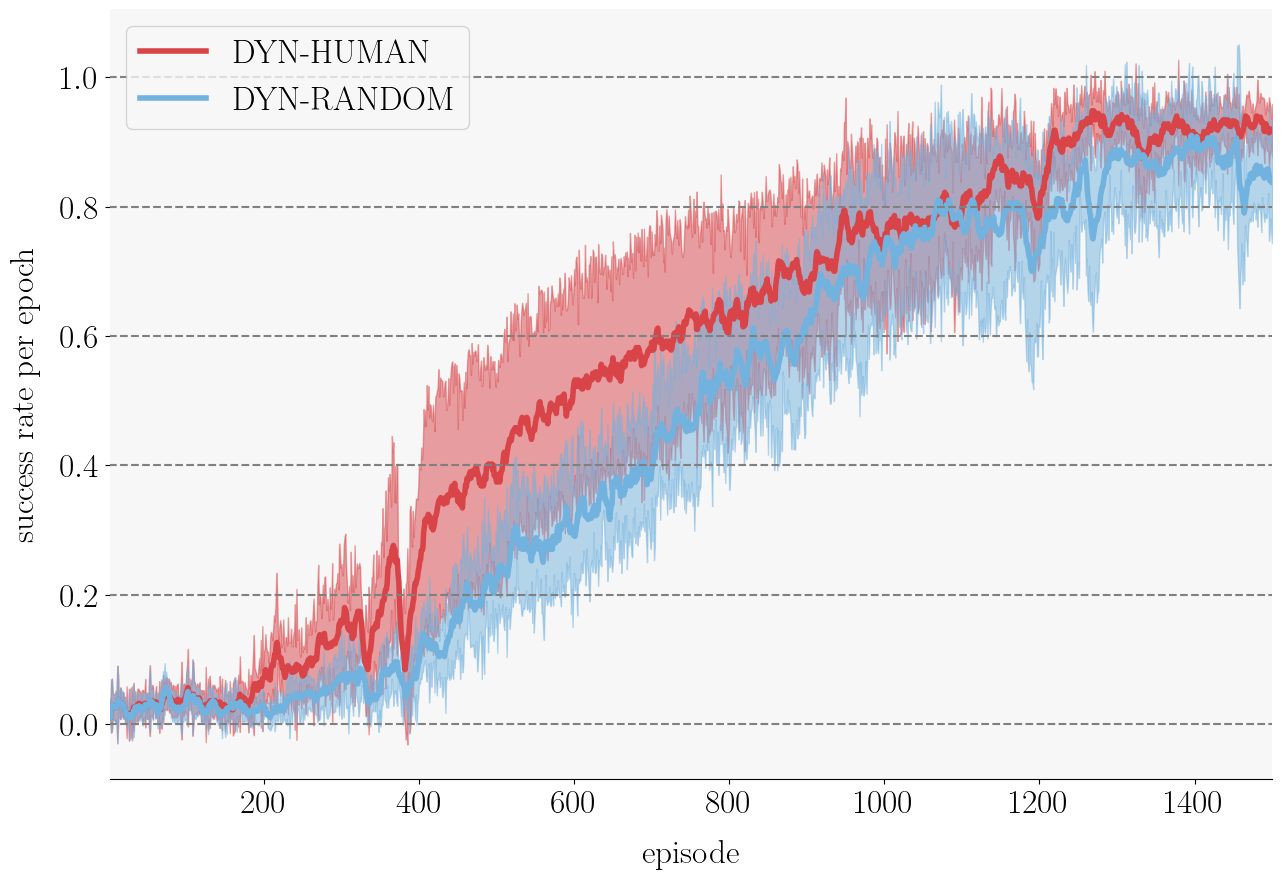

In [21]:
l_episodes = 1500
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=24)
target_pick_df = pick_df.loc[:l_episodes, :]
plot_mean_se(target_pick_df["DTA-mv"], target_pick_df["DTA-lower"], target_pick_df["DTA-upper"], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(target_pick_df["RANDOM-mv"], target_pick_df["RANDOM-lower"], target_pick_df["RANDOM-upper"], "#72B2DF", 0.5, "DYN-RANDOM")
plt.hlines([0, 0.2, 0.4, 0.6, 0.8, 1], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("success rate per epoch", fontsize=24, labelpad=15)
plt.xlabel("episode", fontsize=24, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=24)
plt.savefig("out/picknplace-lc-dynamic-subgoal.pdf", format="pdf")

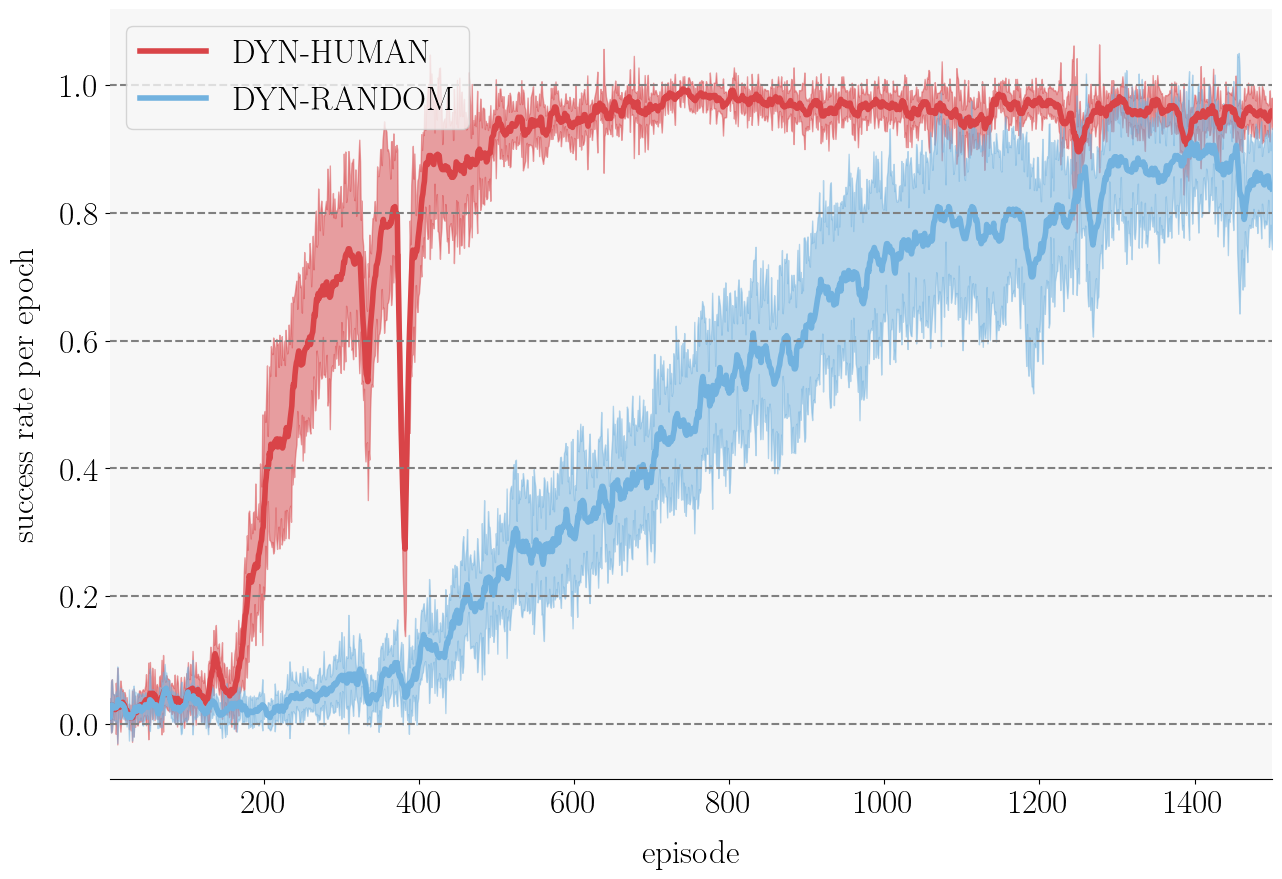

In [22]:
l_episodes = 1500
plt.figure(figsize=(15, 10))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelsize=24)
target_pick_df = pick_df.loc[:l_episodes, :]
plot_mean_se(target_pick_df["SRS-mv"], target_pick_df["SRS-lower"], target_pick_df["SRS-upper"], "#d94448", 0.5, "DYN-HUMAN")
plot_mean_se(target_pick_df["RANDOM-mv"], target_pick_df["RANDOM-lower"], target_pick_df["RANDOM-upper"], "#72B2DF", 0.5, "DYN-RANDOM")
plt.hlines([0, 0.2, 0.4, 0.6, 0.8, 1], 0, l_episodes, "gray", linestyles='dashed')
plt.ylabel("success rate per epoch", fontsize=24, labelpad=15)
plt.xlabel("episode", fontsize=24, labelpad=15)
plt.xlim(1, l_episodes)
plt.legend(fontsize=24)
plt.savefig("out/picknplace-lc-static-subgoal.pdf", format="pdf")

# SRSとDTAの比較

In [10]:
comp_four_df = pd.read_csv("in/results_fourrooms_srs_dta.csv")
comp_pin_df = pd.read_csv("in/results_pinball_srs_dta.csv")
comp_pick_df = pd.read_csv("in/results_m2s_pick_and_place_srs_dta.csv")

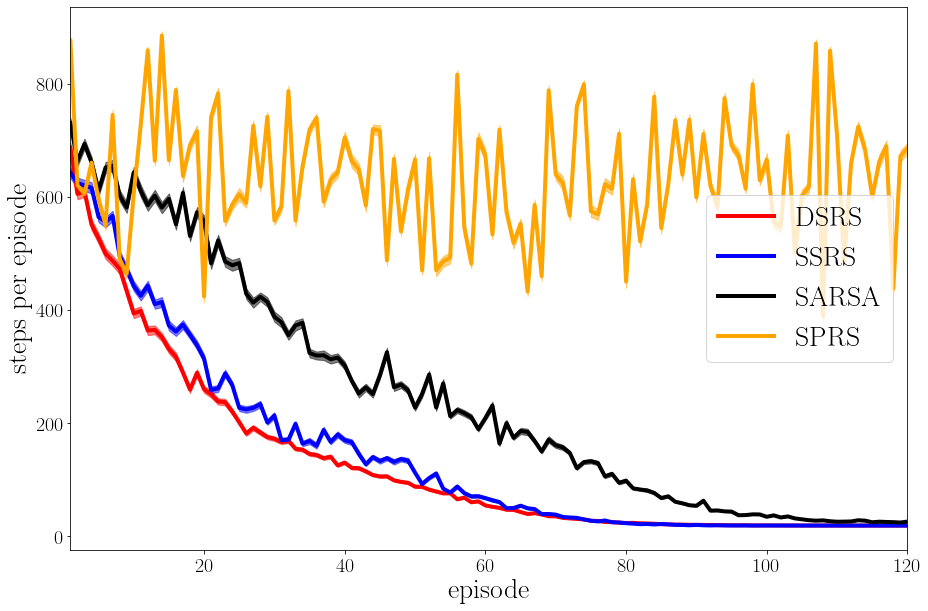

In [12]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_four_df["DTA-mean"][:l_episodes], comp_four_df["DTA-lower"][:l_episodes], comp_four_df["DTA-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_four_df["SRS-mean"][:l_episodes], comp_four_df["SRS-lower"][:l_episodes], comp_four_df["SRS-upper"][:l_episodes], "blue", 0.5, "SSRS")
plot_mean_se(comp_four_df["SARSA-mean"][:l_episodes], comp_four_df["SARSA-lower"][:l_episodes], comp_four_df["SARSA-upper"][:l_episodes], "black", 0.5, "SARSA")
# plot_mean_se(comp_four_df["NRS-mean"][:l_episodes], comp_four_df["NRS-lower"][:l_episodes], comp_four_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(comp_four_df["SPRS-mean"][:l_episodes], comp_four_df["SPRS-lower"][:l_episodes], comp_four_df["SPRS-upper"][:l_episodes], "orange", 0.5, "SPRS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.plot()
plt.savefig("out/comp-4rooms-learning-curves.pdf", format="pdf")
plt.savefig("out/comp-4rooms-learning-curves.png", format="png")

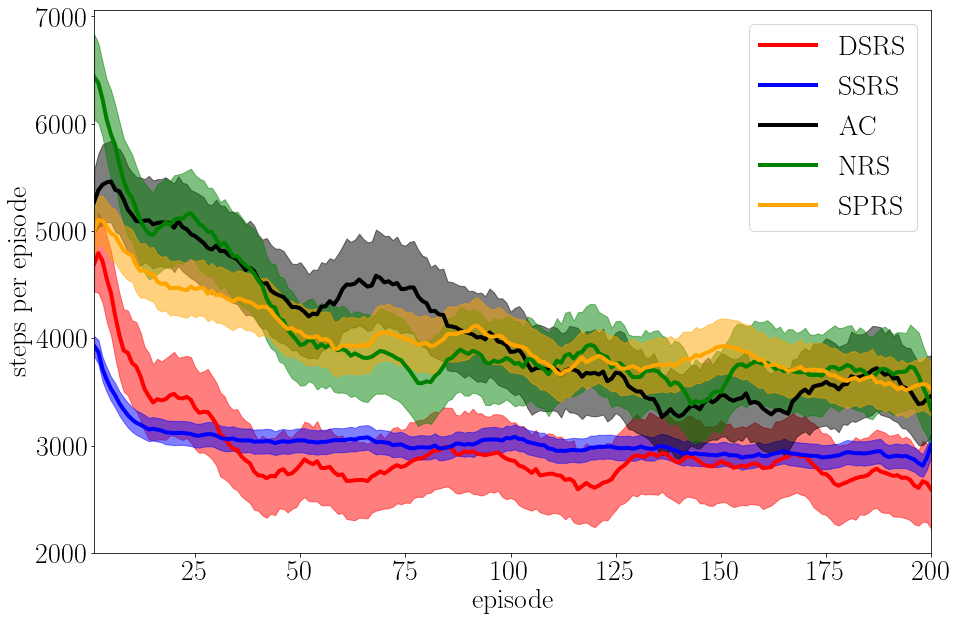

In [14]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_pin_df["DTA-10_moving_average"][:l_episodes], comp_pin_df["DTA-lower"][:l_episodes], comp_pin_df["DTA-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_pin_df["SRS-10_moving_average"][:l_episodes], comp_pin_df["SRS-lower"][:l_episodes], comp_pin_df["SRS-upper"][:l_episodes], "blue", 0.5, "SSRS")
plot_mean_se(comp_pin_df["AC-10_moving_average"][:l_episodes], comp_pin_df["AC-lower"][:l_episodes], comp_pin_df["AC-upper"][:l_episodes], "black", 0.5, "AC")
plot_mean_se(comp_pin_df["NRS-10_moving"][:l_episodes], comp_pin_df["NRS-lower"][:l_episodes], comp_pin_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(comp_pin_df["SPRS-10_moving"][:l_episodes], comp_pin_df["SPRS-lower"][:l_episodes], comp_pin_df["SPRS-upper"][:l_episodes], "orange", 0.5, "SPRS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.tick_params(labelsize=28)
plt.savefig("out/comp-pinball-learning-curves.pdf", format="pdf")
plt.savefig("out/comp-pinball-learning-curves.png", format="png")

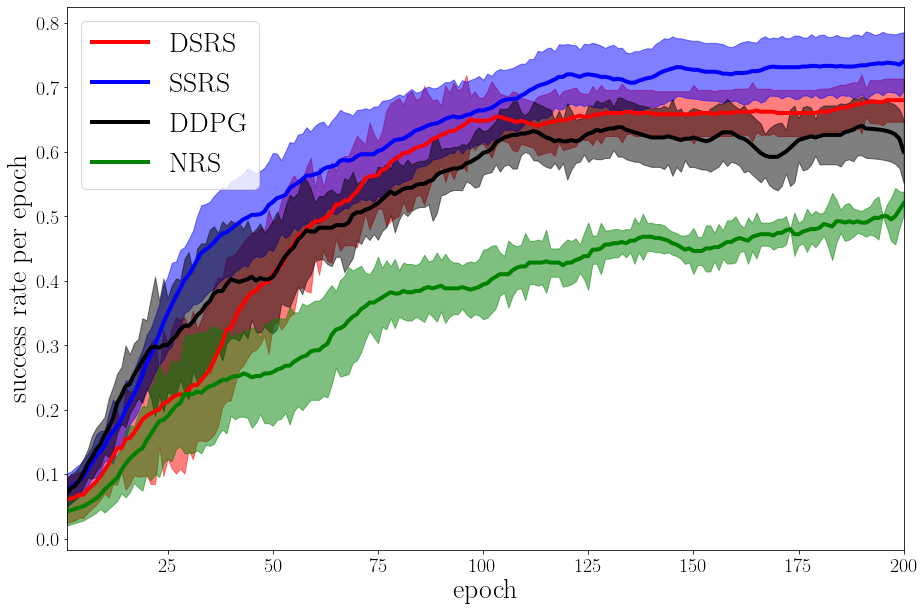

In [11]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_pick_df["DTA-mv"][:l_episodes], comp_pick_df["DTA-lower"][:l_episodes], comp_pick_df["DTA-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_pick_df["SRS-mv"][:l_episodes], comp_pick_df["SRS-lower"][:l_episodes], comp_pick_df["SRS-upper"][:l_episodes], "blue", 0.5, "SSRS")
plot_mean_se(comp_pick_df["DDPG-mv"][:l_episodes], comp_pick_df["DDPG-lower"][:l_episodes], comp_pick_df["DDPG-upper"][:l_episodes], "black", 0.5, "DDPG")
plot_mean_se(comp_pick_df["NRS-mv"][:l_episodes], comp_pick_df["NRS-lower"][:l_episodes], comp_pick_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/comp-m2s_robotics-learning-curves.pdf", format="pdf")

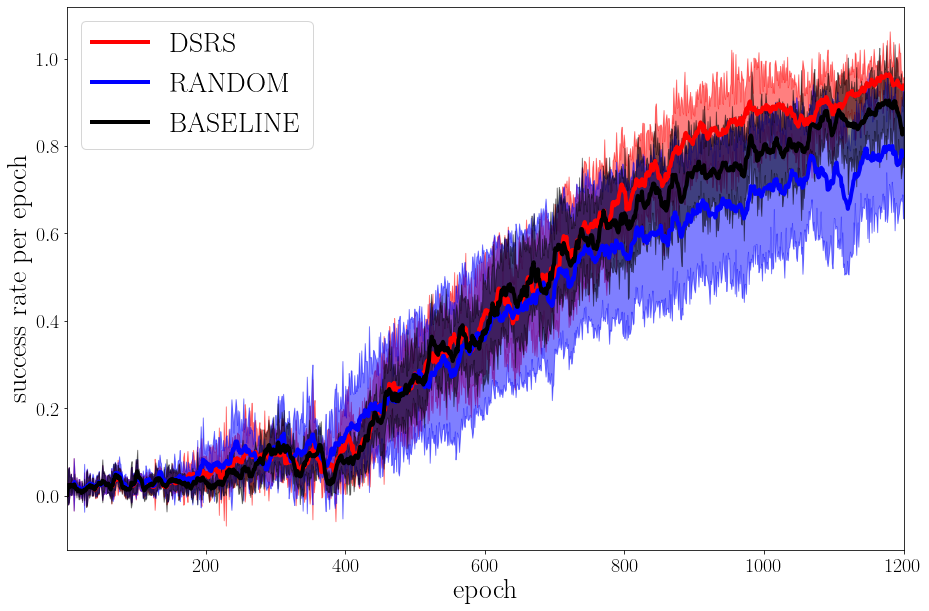

In [19]:
comp_pick_df = pd.read_csv("/home/tokudo/Develop/research/analyze_result/pick_and_place/out/learning_curve.csv")
l_episodes = 1200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_pick_df["DSRS-mv"][:l_episodes], comp_pick_df["DSRS-lower"][:l_episodes], comp_pick_df["DSRS-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_pick_df["Random-mv"][:l_episodes], comp_pick_df["Random-lower"][:l_episodes], comp_pick_df["Random-upper"][:l_episodes], "blue", 0.5, "RANDOM")
# plot_mean_se(comp_pick_df["DDPG-mv"][:l_episodes], comp_pick_df["DDPG-lower"][:l_episodes], comp_pick_df["DDPG-upper"][:l_episodes], "black", 0.5, "DDPG")
# plot_mean_se(comp_pick_df["NRS-mean"][:l_episodes], comp_pick_df["NRS-lower"][:l_episodes], comp_pick_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(comp_pick_df["BASELINE-mv"][:l_episodes], comp_pick_df["BASELINE-lower"][:l_episodes], comp_pick_df["BASELINE-upper"][:l_episodes], "black", 0.5, "BASELINE")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/fixed_subgs-m2s_robotics-learning-curves.pdf", format="pdf")
plt.savefig("out/fixed_subgs-m2s_robotics-learning-curves.png", format="png")

# OLD

In [ ]:
# m2s_pick_df = pd.read_csv("in/results_m2s_pick_and_place_srs.csv")
# crowd_nav_df = pd.read_csv("in/results_crowd_nav.csv")
# crowd_nav_rw_df = pd.read_csv("in/results_crowd_nav_rw.csv")
# crowd_nav_opp_df = pd.read_csv("in/results_crowd_nav_opp.csv")
# crowd_nav_opp_rw_df = pd.read_csv("in/results_crowd_nav_opp_rw.csv")

In [ ]:
l_episodes = 980
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(crowd_nav_rw_df["DTA-mean"][:l_episodes], crowd_nav_rw_df["DTA-lower"][:l_episodes], crowd_nav_rw_df["DTA-upper"][:l_episodes], "red", 0.5, "DTA")
plot_mean_se(crowd_nav_rw_df["CADRL-mean"][:l_episodes], crowd_nav_rw_df["CADRL-lower"][:l_episodes], crowd_nav_rw_df["CADRL-upper"][:l_episodes], "dimgray", 0.5, "CADRL")
plot_mean_se(crowd_nav_rw_df["NRS-mean"][:l_episodes], crowd_nav_rw_df["NRS-lower"][:l_episodes], crowd_nav_rw_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("total reward per episode", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/crowd_nav-reward-learning-curves.pdf", format="pdf")

In [ ]:
l_episodes = 980
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(crowd_nav_df["DTA-mean"][:l_episodes], crowd_nav_df["DTA-lower"][:l_episodes], crowd_nav_df["DTA-upper"][:l_episodes], "red", 0.5, "DTA")
plot_mean_se(crowd_nav_df["CADRL-mean"][:l_episodes], crowd_nav_df["CADRL-lower"][:l_episodes], crowd_nav_df["CADRL-upper"][:l_episodes], "dimgray", 0.5, "CADRL")
plot_mean_se(crowd_nav_df["NRS-mean"][:l_episodes], crowd_nav_df["NRS-lower"][:l_episodes], crowd_nav_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("navigation time per episode", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/crowd_nav-nav_time-learning-curves.pdf", format="pdf")